<a href="https://colab.research.google.com/github/Alexandriosh/simbox/blob/main/Detection_sim_box_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DETECTION SIM BOX

In [1]:
# Importing Liberaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # Grille permettant de placer des sous-plots dans une figure.
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report # Créez un rapport textuel montrant les principales mesures de classification
from sklearn.metrics import average_precision_score # Calculer la précision moyenne (AP) à partir des scores de prédiction
from sklearn.metrics import precision_recall_curve # Calculer les paires précision-rappel pour différents seuils de probabilité
from sklearn.metrics import confusion_matrix # Calculer la matrice de confusion pour évaluer la précision d'une classification

from sklearn.preprocessing import OrdinalEncoder # Coder les caractéristiques catégorielles sous la forme d'un tableau d'entiers
from sklearn.preprocessing import StandardScaler # Normaliser les caractéristiques en supprimant la moyenne et en mettant à l'échelle la variance unitaire

from sklearn.ensemble import RandomForestClassifier # Un classificateur de forêt aléatoire

from sklearn.model_selection import GridSearchCV # Recherche exhaustive sur des valeurs de paramètres spécifiées pour un estimateur

from sklearn.model_selection import RandomizedSearchCV # Recherche aléatoire sur les hyper paramètres

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive




---

[texte du lien](https:// [texte du lien](https:// [texte du lien](https:// [texte du lien](https:// [texte du lien](https://)))))

In [3]:
%cd /gdrive/MyDrive/Colab Notebooks

/gdrive/MyDrive/Colab Notebooks


In [4]:
np.cdouble  = '/gdrive/My Drive/colab notebooks/'

In [5]:
df = pd.read_csv('simbox_dataset.csv')

In [6]:
df.head()

,phone_number,destination,sameID_different_contact_count,revenue_per_day,num_calls_per_day,avg_call_duration,num_sms_per_day,traffic_variation,data_usage_per_day,call_time_of_day,int_to_nat_call_ratio,location_stability,tariff_plan_type,SIMBOX
0,phone_7606,local,0,16.002805,6,30.856024,12,0.621214,80.886735,evening,0.196587,unstable,postpaid,No
1,phone_11657,international,0,20.231093,41,50.844239,15,1.586832,57.255394,morning,0.257501,stable,postpaid,No
2,phone_3854,local,4,22.657283,101,29.840922,32,3.361015,441.001282,evening,0.353893,stable,hybrid,Yes
3,phone_4373,local,3,24.822677,126,35.968815,82,3.755069,468.341236,morning,0.483451,unstable,hybrid,Yes
4,phone_7403,local,0,17.908775,14,23.581950,16,0.202773,25.598822,afternoon,0.425843,stable,hybrid,No


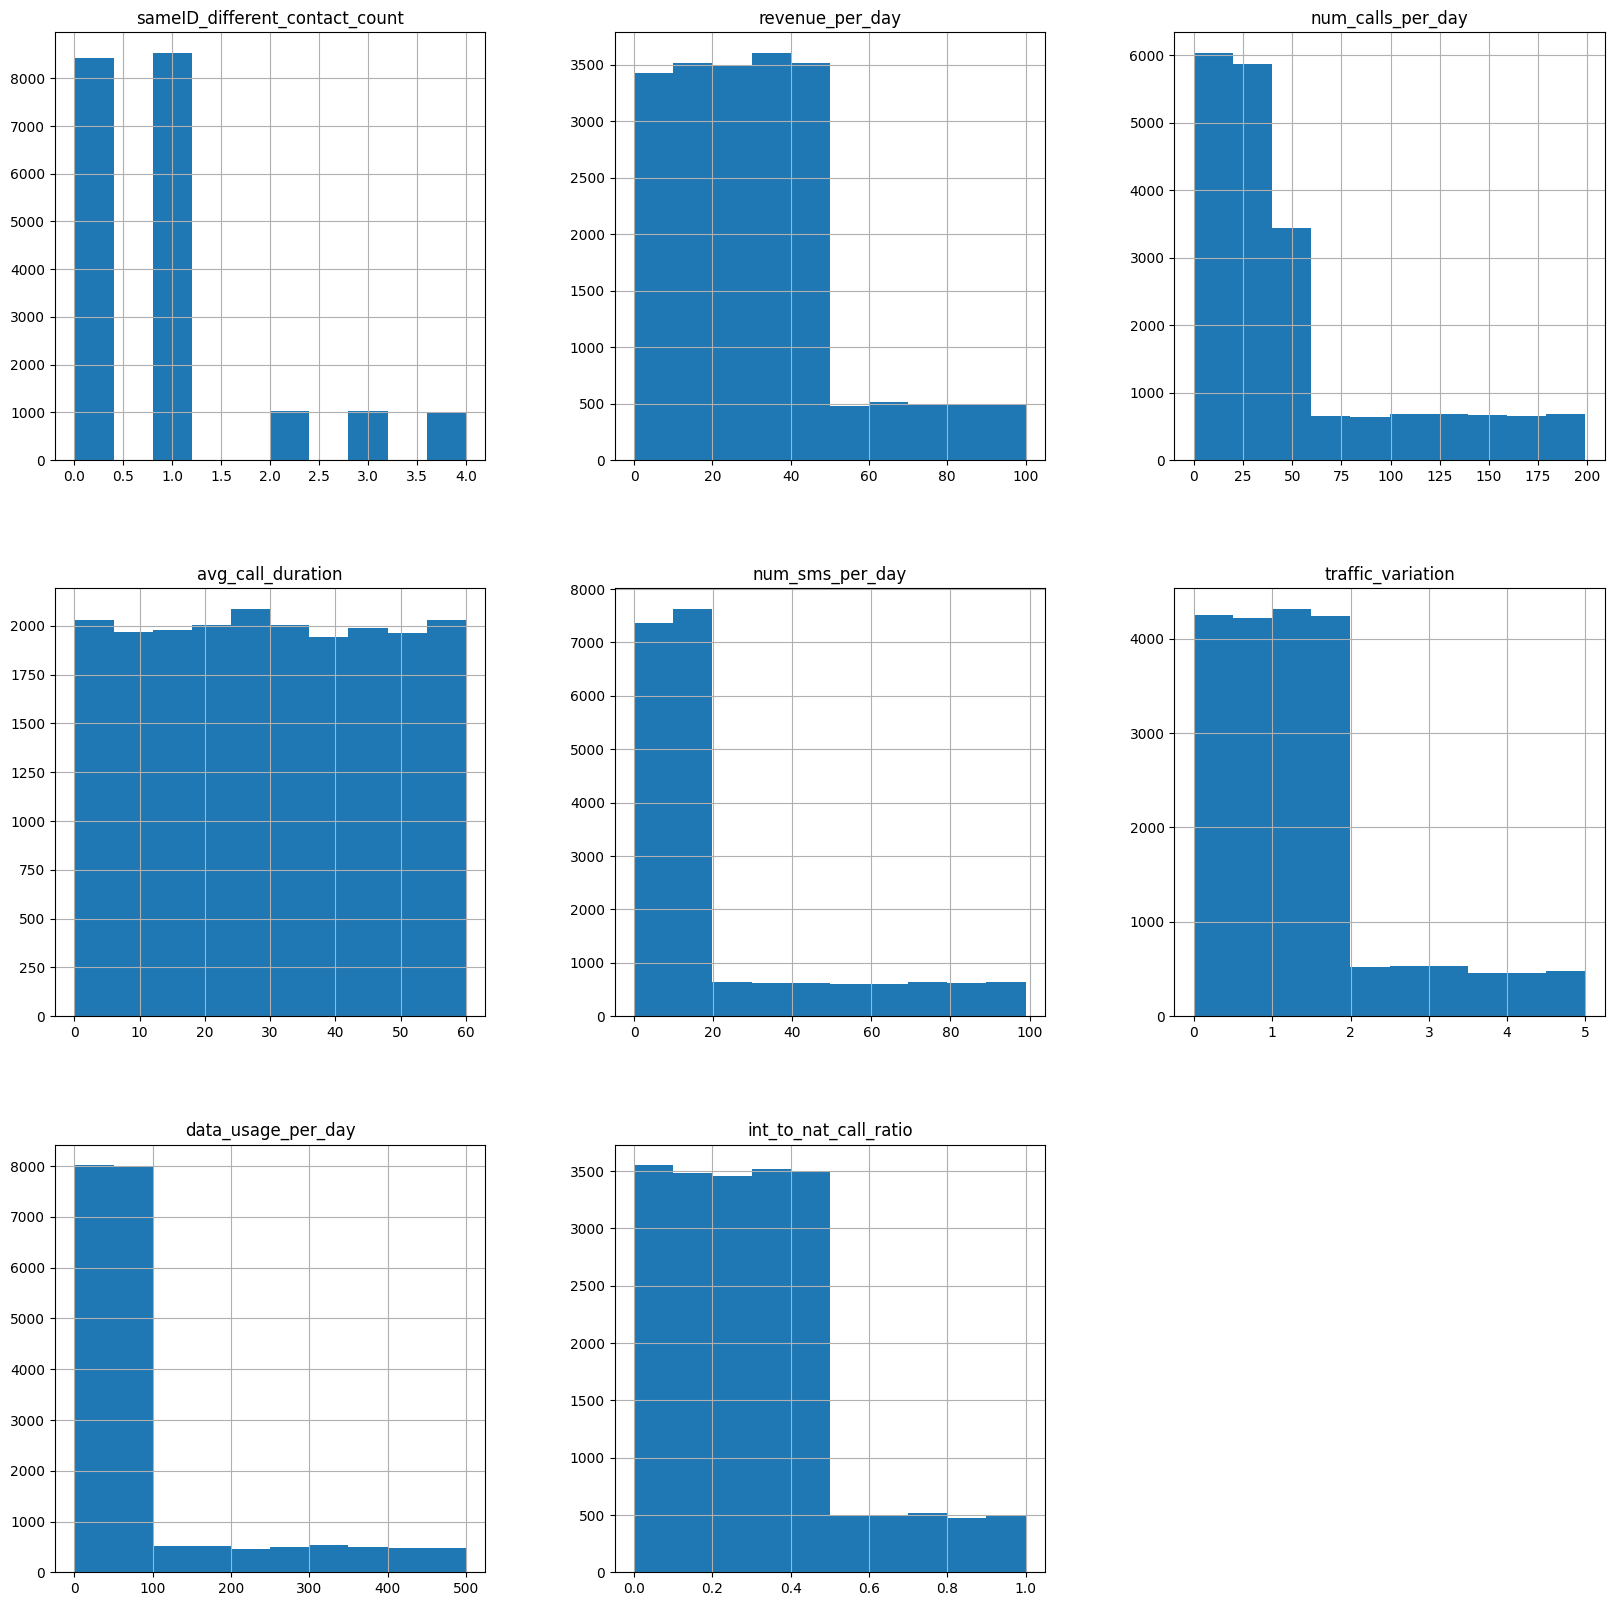

In [7]:
df.hist(figsize = (20, 20))
plt.show()

In [8]:
# Dimension of data
df.shape

(20000, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   phone_number                    20000 non-null  object 
 1   destination                     20000 non-null  object 
 2   sameID_different_contact_count  20000 non-null  int64  
 3   revenue_per_day                 20000 non-null  float64
 4   num_calls_per_day               20000 non-null  int64  
 5   avg_call_duration               20000 non-null  float64
 6   num_sms_per_day                 20000 non-null  int64  
 7   traffic_variation               20000 non-null  float64
 8   data_usage_per_day              20000 non-null  float64
 9   call_time_of_day                20000 non-null  object 
 10  int_to_nat_call_ratio           20000 non-null  float64
 11  location_stability              20000 non-null  object 
 12  tariff_plan_type                

In [10]:
# CHecking Null values
df.isnull().sum()

,0
phone_number,0
destination,0
sameID_different_contact_count,0
revenue_per_day,0
num_calls_per_day,0
avg_call_duration,0
num_sms_per_day,0
traffic_variation,0
data_usage_per_day,0
call_time_of_day,0


In [11]:
# Summarizing data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
sameID_different_contact_count,20000.0,0.882650,1.054768,0.000000,0.000000,1.000000,1.000000,4.000000
revenue_per_day,20000.0,31.263139,21.811707,0.012451,14.520509,28.721599,42.756991,99.998963
num_calls_per_day,20000.0,49.579950,49.952770,0.000000,16.000000,33.000000,49.250000,199.000000
avg_call_duration,20000.0,29.945949,17.315580,0.009784,14.995309,29.794296,44.930472,59.991388
num_sms_per_day,20000.0,22.123150,25.107340,0.000000,6.000000,13.000000,19.250000,99.000000
traffic_variation,20000.0,1.366534,1.077002,0.000070,0.587616,1.178728,1.759635,4.997582
data_usage_per_day,20000.0,99.535869,114.910065,0.004332,31.365525,62.048826,93.681474,499.762023
int_to_nat_call_ratio,20000.0,0.311750,0.219111,0.000003,0.142829,0.284882,0.428970,0.999994


In [12]:
df['SIMBOX'] = df['SIMBOX'].replace({'Yes': 1, 'No': 0})

<ipython-input-12-f89bdc001898>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['SIMBOX'] = df['SIMBOX'].replace({'Yes': 1, 'No': 0})


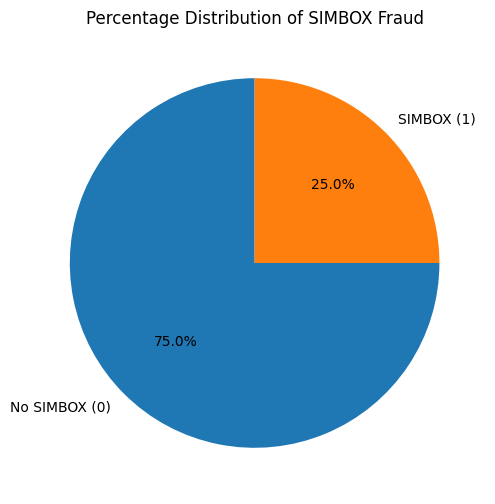

In [13]:
# Calculate percentages
simbox_counts = df['SIMBOX'].value_counts()
percentages = (simbox_counts / simbox_counts.sum()) * 100

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=['No SIMBOX (0)', 'SIMBOX (1)'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution of SIMBOX Fraud')
plt.show()

In [ ]:
df

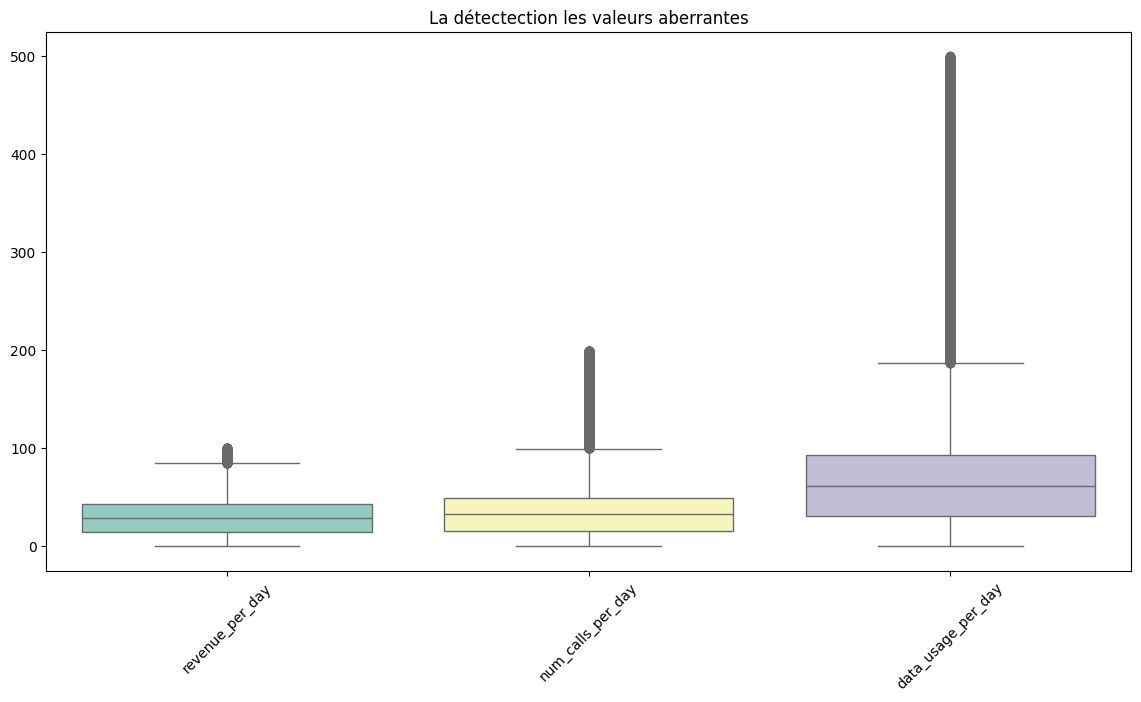

In [14]:
# Visualisation des boxplots pour certaines variables
plt.figure(figsize=(14, 7))
sns.boxplot(data=df[['revenue_per_day', 'num_calls_per_day', 'data_usage_per_day']], palette='Set3')
plt.title('La détectection les valeurs aberrantes')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from scipy import stats


# Calcul du Z-score pour chaque variable continue
z_scores = np.abs(stats.zscore(df[['revenue_per_day', 'num_calls_per_day', 'data_usage_per_day']]))
outliers = np.where(z_scores > 3)

# Afficher les lignes contenant des valeurs aberrantes
df_outliers = df.iloc[outliers[0]]
print(df_outliers)

In [ ]:
# Comparaison des statistiques descriptives entre SIMBOX et non-SIMBOX
simbox_stats = df.groupby('SIMBOX').agg({
    'revenue_per_day': ['mean', 'median', 'std'],
    'num_calls_per_day': ['mean', 'median', 'std'],
    'data_usage_per_day': ['mean', 'median', 'std'],
    'avg_call_duration': ['mean', 'median', 'std']
})

print(simbox_stats)

<ipython-input-15-6b28df721b91>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SIMBOX', y='revenue_per_day', data=df, palette='coolwarm')
<ipython-input-15-6b28df721b91>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SIMBOX', y='num_calls_per_day', data=df, palette='coolwarm')
<ipython-input-15-6b28df721b91>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SIMBOX', y='data_usage_per_day', data=df, palette='coolwarm')


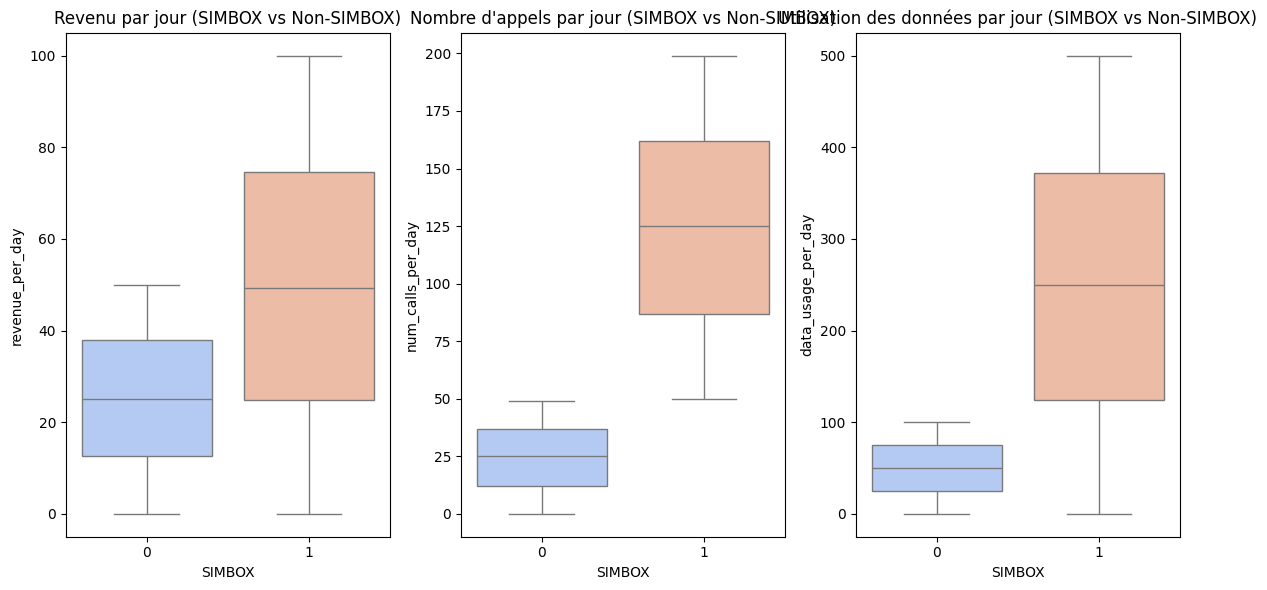

In [15]:
# Boxplots pour comparer les groupes SIMBOX et non-SIMBOX
plt.figure(figsize=(12, 6))

# Revenu par jour
plt.subplot(1, 3, 1)
sns.boxplot(x='SIMBOX', y='revenue_per_day', data=df, palette='coolwarm')
plt.title('Revenu par jour (SIMBOX vs Non-SIMBOX)')

# Nombre d'appels par jour
plt.subplot(1, 3, 2)
sns.boxplot(x='SIMBOX', y='num_calls_per_day', data=df, palette='coolwarm')
plt.title('Nombre d\'appels par jour (SIMBOX vs Non-SIMBOX)')

# Utilisation des données par jour
plt.subplot(1, 3, 3)
sns.boxplot(x='SIMBOX', y='data_usage_per_day', data=df, palette='coolwarm')
plt.title('Utilisation des données par jour (SIMBOX vs Non-SIMBOX)')

plt.tight_layout()
plt.show()


In [ ]:
# Extraire le préfixe (par exemple, les trois premiers chiffres) des numéros de téléphone
df['phone_prefix'] = df['phone_number'].astype(str).str[:3]

# Visualiser la distribution des préfixes par rapport à SIMBOX
plt.figure(figsize=(12, 6))
sns.countplot(x='phone_prefix', hue='SIMBOX', data=df, palette='coolwarm', order=df['phone_prefix'].value_counts().index)
plt.title('Distribution des préfixes de numéro de téléphone par SIMBOX')
plt.xlabel('Préfixe de numéro')
plt.ylabel('Nombre')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Comparer le revenu par stabilité de localisation
plt.figure(figsize=(10, 6))
sns.boxplot(x='location_stability', y='revenue_per_day', data=df, palette='Set2')
plt.title('Revenu par jour en fonction de la stabilité de localisation')
plt.xlabel('Stabilité de localisation')
plt.ylabel('Revenu par jour')
plt.show()

# Analyser la corrélation entre l'utilisation des données et le revenu
plt.figure(figsize=(10, 6))
sns.scatterplot(x='data_usage_per_day', y='revenue_per_day', hue='location_stability', data=df, palette='coolwarm')
plt.title('Revenu par jour en fonction de l\'utilisation des données')
plt.xlabel('Utilisation des données par jour')
plt.ylabel('Revenu par jour')
plt.show()

# Calcul de la corrélation entre revenu et utilisation des données
correlation = df[['revenue_per_day', 'data_usage_per_day']].corr()
print(correlation)


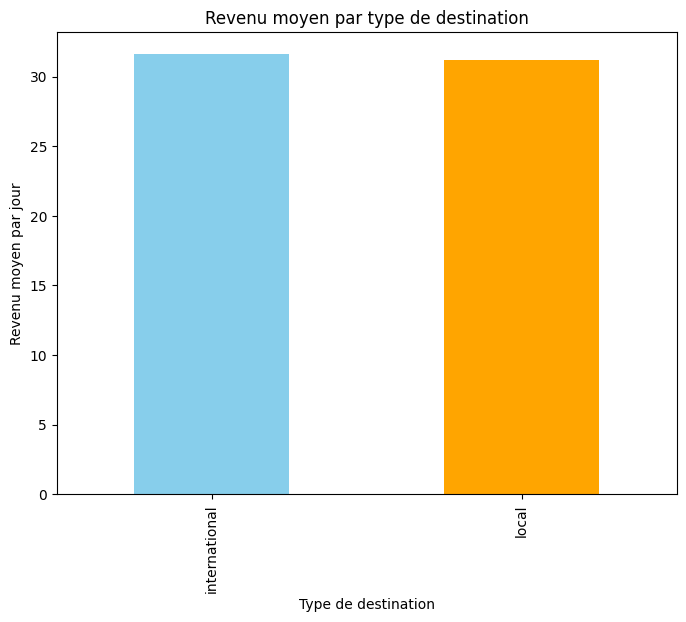

In [18]:
# Groupement par destination et calcul du revenu moyen
revenue_by_destination = df.groupby('destination')['revenue_per_day'].mean()

# Affichage des résultats
plt.figure(figsize=(8, 6))
revenue_by_destination.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Revenu moyen par type de destination')
plt.xlabel('Type de destination')
plt.ylabel('Revenu moyen par jour')
plt.show()


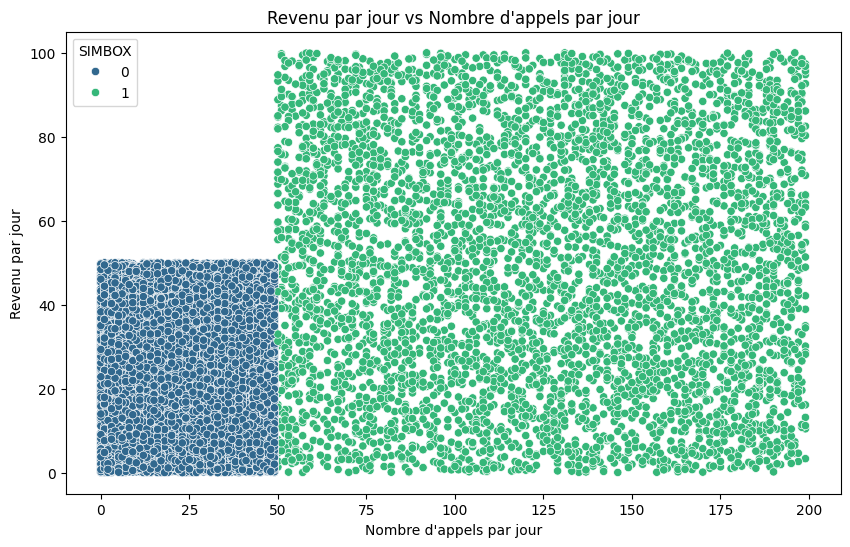

In [17]:
# Revenu vs Nombre d'appels par jour en fonction du SIMBOX
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_calls_per_day', y='revenue_per_day', hue='SIMBOX', data=df, palette='viridis')
plt.title("Revenu par jour vs Nombre d'appels par jour")
plt.xlabel("Nombre d'appels par jour")
plt.ylabel('Revenu par jour')
plt.show()

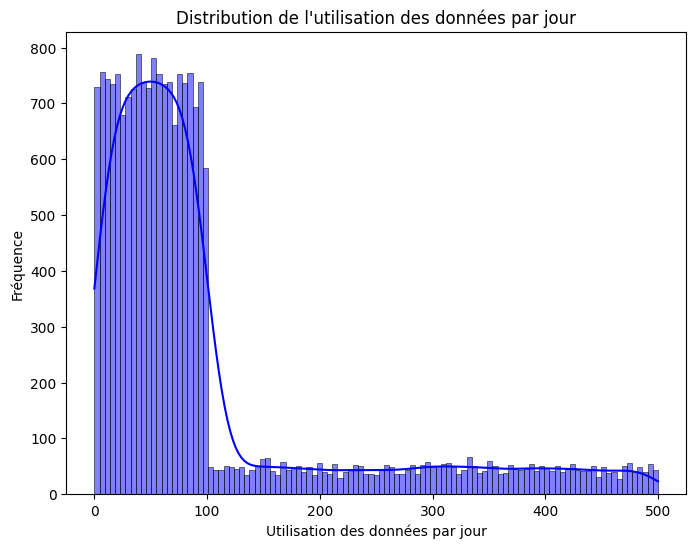

In [16]:
# Distribution de l'utilisation des données par jour
plt.figure(figsize=(8, 6))
sns.histplot(df['data_usage_per_day'], kde=True, color='blue')
plt.title("Distribution de l'utilisation des données par jour")
plt.xlabel('Utilisation des données par jour')
plt.ylabel('Fréquence')
plt.show()

<ipython-input-19-71e60e12c3f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='call_time_of_day', y='avg_call_duration', data=df, palette='viridis')


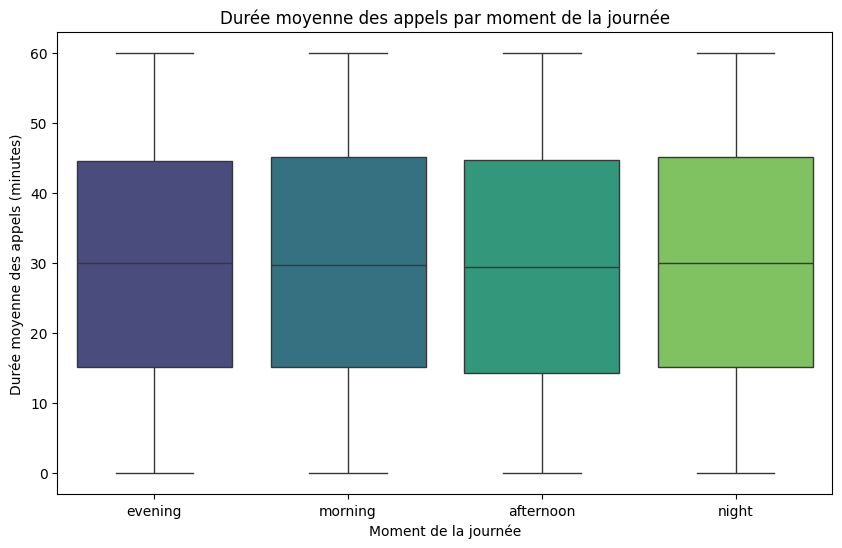

In [19]:


# Analyse de la durée des appels par moment de la journée
plt.figure(figsize=(10, 6))
sns.boxplot(x='call_time_of_day', y='avg_call_duration', data=df, palette='viridis')
plt.title('Durée moyenne des appels par moment de la journée')
plt.xlabel('Moment de la journée')
plt.ylabel('Durée moyenne des appels (minutes)')
plt.show()


# Pre prosesing

In [20]:
df = pd.read_csv('simbox_dataset.csv')

In [21]:
df['SIMBOX'] = df['SIMBOX'].replace({'Yes': 1, 'No': 0})

<ipython-input-21-f89bdc001898>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['SIMBOX'] = df['SIMBOX'].replace({'Yes': 1, 'No': 0})


In [22]:
df.head()

,phone_number,destination,sameID_different_contact_count,revenue_per_day,num_calls_per_day,avg_call_duration,num_sms_per_day,traffic_variation,data_usage_per_day,call_time_of_day,int_to_nat_call_ratio,location_stability,tariff_plan_type,SIMBOX
0,phone_7606,local,0,16.002805,6,30.856024,12,0.621214,80.886735,evening,0.196587,unstable,postpaid,0
1,phone_11657,international,0,20.231093,41,50.844239,15,1.586832,57.255394,morning,0.257501,stable,postpaid,0
2,phone_3854,local,4,22.657283,101,29.840922,32,3.361015,441.001282,evening,0.353893,stable,hybrid,1
3,phone_4373,local,3,24.822677,126,35.968815,82,3.755069,468.341236,morning,0.483451,unstable,hybrid,1
4,phone_7403,local,0,17.908775,14,23.581950,16,0.202773,25.598822,afternoon,0.425843,stable,hybrid,0


In [23]:
from sklearn.model_selection import train_test_split # Diviser les tableaux ou les matrices en sous-ensembles aléatoires d'entrainement et de test

In [24]:
df = df.drop('phone_number', axis=1)

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['location_stability'] = le.fit_transform(df['location_stability'])
df['call_time_of_day'] = le.fit_transform(df['call_time_of_day'])
df['destination'] = le.fit_transform(df['destination'])
df['tariff_plan_type'] = le.fit_transform(df['tariff_plan_type'])
df

,destination,sameID_different_contact_count,revenue_per_day,num_calls_per_day,avg_call_duration,num_sms_per_day,traffic_variation,data_usage_per_day,call_time_of_day,int_to_nat_call_ratio,location_stability,tariff_plan_type,SIMBOX
0,1,0,16.002805,6,30.856024,12,0.621214,80.886735,1,0.196587,1,1,0
1,0,0,20.231093,41,50.844239,15,1.586832,57.255394,2,0.257501,0,1,0
2,1,4,22.657283,101,29.840922,32,3.361015,441.001282,1,0.353893,0,0,1
3,1,3,24.822677,126,35.968815,82,3.755069,468.341236,2,0.483451,1,0,1
4,1,0,17.908775,14,23.581950,16,0.202773,25.598822,0,0.425843,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,4,72.554684,52,12.961463,84,3.332834,311.731173,0,0.833249,0,1,1
19996,1,1,34.276133,4,9.029200,15,1.574623,47.678982,3,0.402851,0,2,0
19997,1,0,41.687440,41,53.927509,14,1.087935,98.814590,1,0.067138,0,0,0
19998,1,0,37.797117,13,56.115123,4,0.415882,53.035629,2,0.349353,0,2,0


In [26]:
from sklearn.preprocessing import MinMaxScaler

# Sélectionner les colonnes numériques à normaliser
numerical_features = ['revenue_per_day', 'num_calls_per_day', 'data_usage_per_day', 'avg_call_duration']

# Créer un objet MinMaxScaler
scaler = MinMaxScaler()

# Ajuster et transformer les données numériques
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Afficher les données normalisées
print(df.head())

   destination  sameID_different_contact_count  revenue_per_day  \
0            1                               0         0.159925   
1            0                               0         0.202214   
2            1                               4         0.226479   
3            1                               3         0.248136   
4            1                               0         0.178987   

   num_calls_per_day  avg_call_duration  num_sms_per_day  traffic_variation  \
0           0.030151           0.514262               12           0.621214   
1           0.206030           0.847501               15           1.586832   
2           0.507538           0.497338               32           3.361015   
3           0.633166           0.599501               82           3.755069   
4           0.070352           0.392990               16           0.202773   

   data_usage_per_day  call_time_of_day  int_to_nat_call_ratio  \
0            0.161843                 1               0.

In [27]:
y = df['SIMBOX']
X = df.drop('SIMBOX', axis=1)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (16000, 12)
Test set: (4000, 12)


# **MODELISATION**

# SMV

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


print("X train shape", X_train.shape)
print("X validation shape", X_val.shape)
print("y train shape", y_train.shape)
print("y validation shape", y_val.shape)

X train shape (14000, 12)
X validation shape (6000, 12)
y train shape (14000,)
y validation shape (6000,)


In [30]:
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve


def print_score(model, X_train, y_train, X_test, y_test, train=True):
    '''
    This function prints the accuracy score of the model.
    '''
    if train:
        pred = model.predict(X_train)
        acc = accuracy_score(y_train, pred)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {acc:.4f}\n")
    else:
        pred = model.predict(X_test)
        acc = accuracy_score(y_test, pred)
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {acc:.4f}\n")

model = LinearSVC(loss='hinge', dual=True)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_val, y_val, train=True)
print_score(model, X_train, y_train, X_val, y_val, train=False)



Train Result:
Accuracy Score: 0.9999

Test Result:
Accuracy Score: 0.9997



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [31]:
y_pred1 = model.predict(X_val)

In [32]:
from sklearn.metrics import classification_report


# classification report
print(classification_report(y_val,y_pred1, digits=4))

              precision    recall  f1-score   support

           0     0.9996    1.0000    0.9998      4519
           1     1.0000    0.9986    0.9993      1481

    accuracy                         0.9997      6000
   macro avg     0.9998    0.9993    0.9996      6000
weighted avg     0.9997    0.9997    0.9997      6000



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

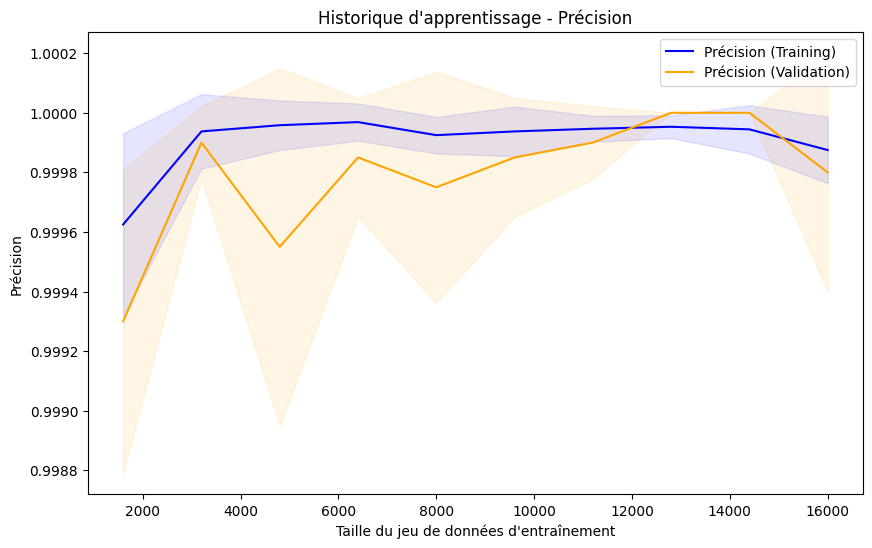

In [33]:
# Calculate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Précision (Training)', color='blue')
plt.fill_between(
    train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1
)
plt.plot(train_sizes, test_mean, label='Précision (Validation)', color='orange')
plt.fill_between(
    train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.1
)
plt.title('Historique d\'apprentissage - Précision')
plt.ylabel('Précision')
plt.xlabel('Taille du jeu de données d\'entraînement')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import confusion_matrix


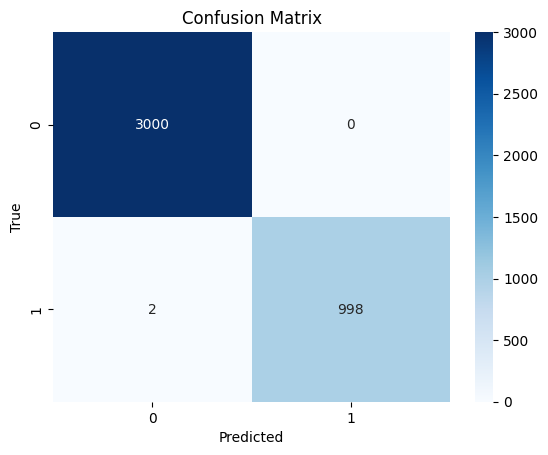

In [35]:
cm = confusion_matrix(y_test, model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

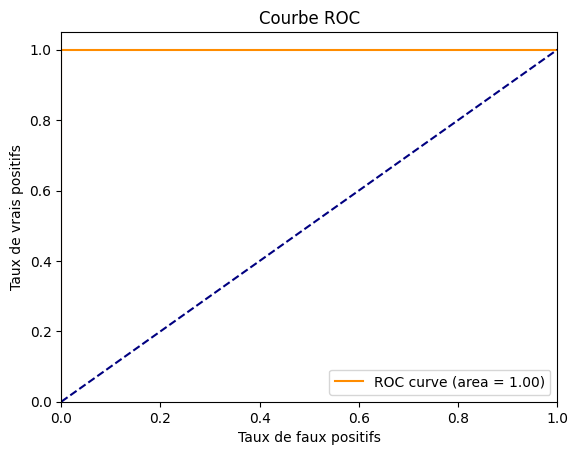

In [36]:
# Courbe ROC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


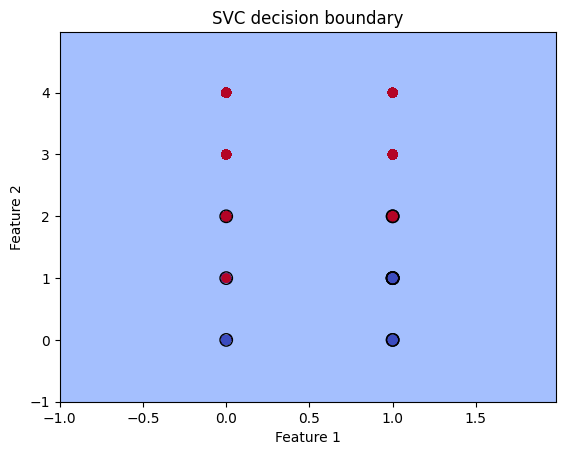

In [37]:
# Import the svm module from sklearn
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Créer une grille pour tracer les contours
# Use .iloc to access the data as a NumPy array for slicing
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
h = .02  # Taille du pas dans la grille
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Create a new dataset for prediction with all 12 features
# Assuming the first two features are used for visualization
# Replace with the actual feature columns if different
X_grid = np.zeros((xx.ravel().shape[0], 12))  # Initialize with zeros for all 12 features
X_grid[:, 0] = xx.ravel()  # Assign values for the first feature
X_grid[:, 1] = yy.ravel()  # Assign values for the second feature
# You might need to assign appropriate values for the other 10 features based on your data

# Prédire les valeurs pour chaque point de la grille using the new dataset
Z = clf.predict(X_grid)
Z = Z.reshape(xx.shape)

# Tracer les contours et les points de données
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Use .iloc to access the data as a NumPy array for slicing
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVC decision boundary')

# Obtenir les vecteurs supports
support_vectors = clf.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=80, facecolors='none', edgecolors='k')
plt.show()

# RNN

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [40]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [42]:
scaler = StandardScaler()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 101)

In [44]:
y_train.unique()

array([0, 1])

In [45]:
# Create oversampling neural network.
n_inputs = X_train.shape[1]

model_1 = keras.Sequential([
    layers.Dense(n_inputs, input_dim=n_inputs, activation='relu'),
    layers.Dense(35, activation='relu'),
    layers.Dense(35, activation='relu'),
    layers.Dense(15, activation='relu'),
    layers.Dense( 5, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model_1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 35)                  │             455 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 35)                  │           1,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 15)                  │             540 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# using Adam as the optimiser
model_1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Stop training when a monitored metric has stopped improving after 5 epochs.
early_stop_1 = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=1,
    patience=5
)

In [47]:

!pip install scikit-learn

In [48]:
print(X_train.dtypes)
print(y_train.dtype)

destination                         int64
sameID_different_contact_count      int64
revenue_per_day                   float64
num_calls_per_day                 float64
avg_call_duration                 float64
num_sms_per_day                     int64
traffic_variation                 float64
data_usage_per_day                float64
call_time_of_day                    int64
int_to_nat_call_ratio             float64
location_stability                  int64
tariff_plan_type                    int64
dtype: object
int64


In [49]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
# En supposant que X_train est un DataFrame pandas. Sinon, convertissez-le d'abord.
X_train_encoded = ohe.fit_transform(X_train.select_dtypes(include='object'))

# Convertir y_train en numérique si elle est catégorielle
if y_train.dtype == 'object':
  from sklearn.preprocessing import LabelEncoder

  le = LabelEncoder()
  y_train = le.fit_transform(y_train)

In [50]:
# Training the model
history_1 = model_1.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=100,
    validation_data=(X_test,y_test),
    callbacks=[early_stop_1]
)

Epoch 1/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7519 - loss: 0.5443 - val_accuracy: 0.9700 - val_loss: 0.0987
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9785 - loss: 0.0726 - val_accuracy: 0.9862 - val_loss: 0.0375
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9907 - loss: 0.0324 - val_accuracy: 0.9942 - val_loss: 0.0207
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9958 - loss: 0.0144 - val_accuracy: 0.9967 - val_loss: 0.0163
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9978 - loss: 0.0095 - val_accuracy: 0.9985 - val_loss: 0.0068
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9982 - loss: 0.0068 - val_accuracy: 0.9987 - val_loss: 0.0049
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9984 - loss: 0.0051 - val_accuracy: 0.9970 - val_loss: 0.0095
Epoch 8/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9990 - loss: 0.0037 - val_accuracy: 0

<Axes: >

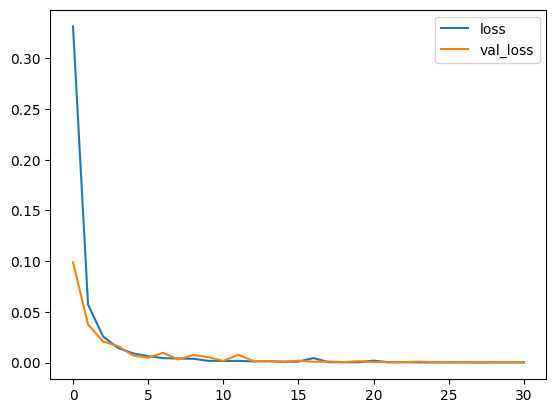

In [51]:
# Plot learning history: Accuracy
pd.DataFrame(history_1.history)[['loss','val_loss']].plot()

In [52]:
# Generate predictions for samples
y_pred_2 = model_1.predict(X_test, batch_size=500, verbose=0)

In [53]:
# Get predicted values.
y_pred2 = []
for i in y_pred_2:
    if i[0] > 0.5:
        y_pred2.append(1.0) # Append 1.0 to y_pred2 if i[0] > 0.5
    else:
        y_pred2.append(0.0) # Append 0.0 to y_pred2 if i[0] <= 0.5
y_pred2 = pd.Series(y_pred2, dtype=int)

In [54]:
from sklearn.metrics import classification_report

# classification report
print(classification_report(y_test,y_pred2, digits=4))

              precision    recall  f1-score   support

           0     0.9997    1.0000    0.9998      3019
           1     1.0000    0.9990    0.9995       981

    accuracy                         0.9998      4000
   macro avg     0.9998    0.9995    0.9997      4000
weighted avg     0.9998    0.9998    0.9997      4000



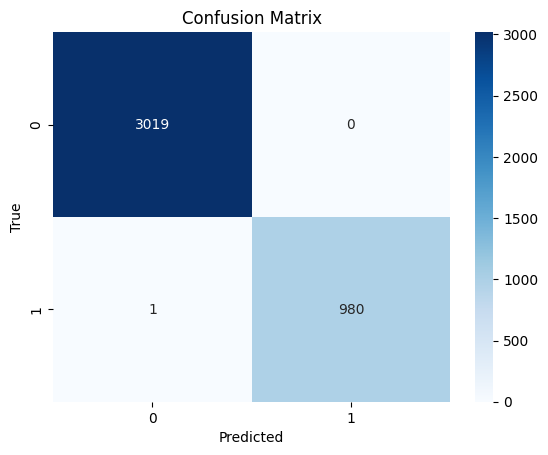

In [55]:

cm = confusion_matrix(y_test, y_pred2)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

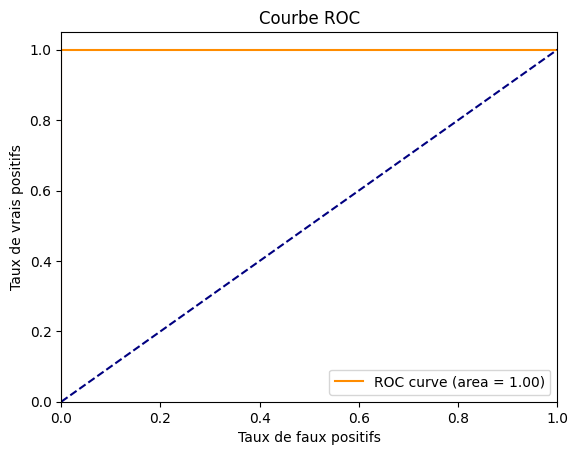

In [56]:
# Courbe ROC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

# random forest

## clf.fit(training, training_labels) : Entraîne un modèle de forêt aléatoire avec des paramètres par défaut.






In [ ]:
from sklearn.ensemble import RandomForestClassifier # Un classificateur de forêt aléatoire

In [ ]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# instantiate the classifier
rfc = RandomForestClassifier(random_state=0)
# fit the model
rfc.fit(X_train, y_train)
# Predict the Test set results
y_pred3 = rfc.predict(X_test)
# Check accuracy score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 1.0000


In [ ]:
# Récupérer l'importance des caractéristiques
importances = rfc.feature_importances_

# Convertir les importances en pourcentage
importances_percentage = importances * 100

# Créer un DataFrame pour organiser et trier les importances des caractéristiques
importances_df = pd.DataFrame(importances_percentage, index=X_train.columns, columns=['Importance (%)'])
importances_df = importances_df.sort_values(by='Importance (%)', ascending=False)



### Afficher les importances des caractéristiques


Plus l'importance d'une caractéristique est élevée, plus elle a influencé les décisions du modèle.

In [ ]:
print(importances_df)

                                Importance (%)
num_calls_per_day                    27.807727
num_sms_per_day                      27.587434
data_usage_per_day                   18.789741
sameID_different_contact_count        7.266057
traffic_variation                     7.114854
int_to_nat_call_ratio                 6.141594
revenue_per_day                       5.113041
location_stability                    0.175195
avg_call_duration                     0.004337
call_time_of_day                      0.000015
destination                           0.000005
tariff_plan_type                      0.000000


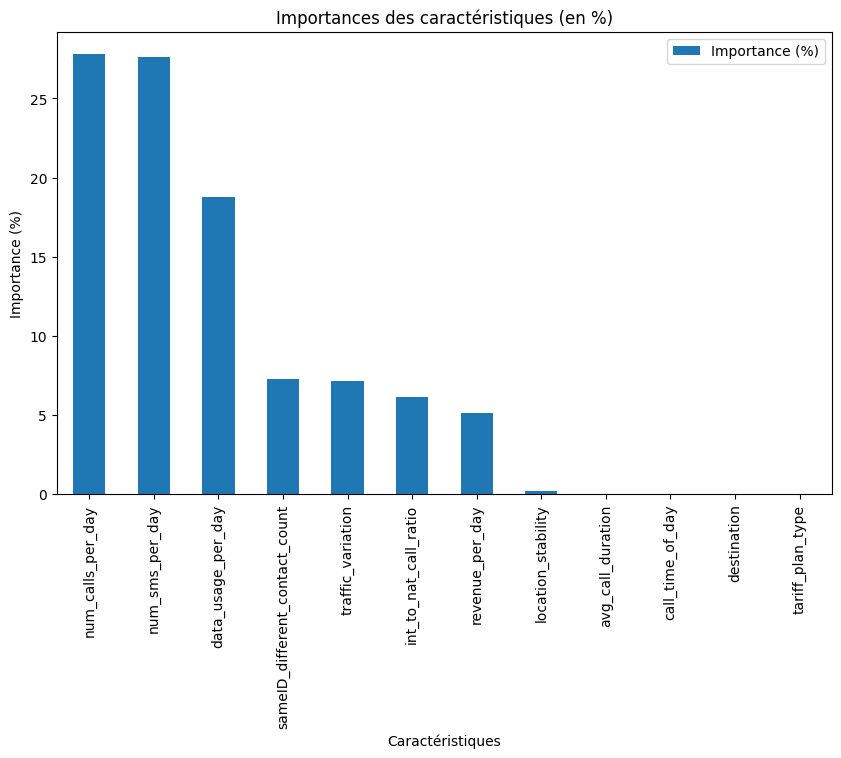

In [ ]:
# Visualisation des importances des caractéristiques en pourcentage
importances_df.plot(kind='bar', figsize=(10, 6))
plt.title('Importances des caractéristiques (en %)')
plt.ylabel('Importance (%)')
plt.xlabel('Caractéristiques')
plt.show()

In [ ]:

from sklearn.metrics import classification_report

print("Rapport de classification sur les données d'entrainement")
print(classification_report(y_train, rfc.predict(X_train)))
preds = rfc.predict(X_test)
print(classification_report(y_test, preds))
#print('Rapport de classification sur les données de test')
#print(classification_report(y_test, preds))

Rapport de classification sur les données d'entrainement
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11981
           1       1.00      1.00      1.00      4019

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3019
           1       1.00      1.00      1.00       981

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [ ]:
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

1.0
1.0


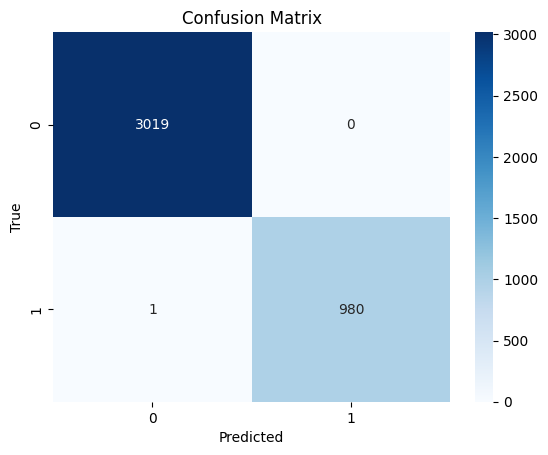

In [ ]:
from sklearn.metrics import confusion_matrix

train_preds = rfc.predict(X_train)

# Generate the confusion matrix using the training data and predictions
confusion_matrix(y_train, train_preds,  labels = [0, 1])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
confusion_matrix(testing_labels, preds,  labels = [0, 1])

array([[4519,    0],
       [   0, 1481]])

Prédiction

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



y_true = y_test
y_score3 = rfc.predict_proba(X_test)[:, 1]

fpr1, tpr1, thresholds1 = roc_curve(y_true, y_score1)


In [ ]:
# Voici un exemple de transaction avec des valeurs fictives pour chaque caractéristique
nouvelle_transaction = np.array([[5, 10, 150.0, 3, 0.05, 100, 0.5, 1, 60, 2, 3, 0]])

# Prédire la classe de la nouvelle transaction
prediction = rfc.predict(nouvelle_transaction)

# Afficher le résultat de la prédiction
if prediction[0] == 1:
    print("La transaction est prédite comme frauduleuse.")
else:
    print("La transaction est prédite comme non frauduleuse.")


La transaction est prédite comme frauduleuse.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
pd.DataFrame(rfc.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)

,0
num_calls_per_day,2.780773e-01
num_sms_per_day,2.758743e-01
data_usage_per_day,1.878974e-01
sameID_different_contact_count,7.266057e-02
traffic_variation,7.114854e-02
int_to_nat_call_ratio,6.141594e-02
revenue_per_day,5.113041e-02
location_stability,1.751946e-03
avg_call_duration,4.336803e-05
call_time_of_day,1.515270e-07


In [ ]:
# Nombre d'arbres dans la forêt aléatoire
n_estimators = np.linspace(100, 3000, int((3000-100)/200) + 1, dtype=int)
# Nombre de caractéristiques à prendre en compte à chaque fractionnement
max_features = ['auto', 'sqrt']
# Nombre maximal de niveaux dans l'arbre
max_depth = [1, 5, 10, 20, 50, 75, 100, 150, 200]
# Nombre minimum d'échantillons requis pour scinder un nœud
# min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
min_samples_split = [2, 5, 10, 15, 20, 30]
# Nombre minimum d'échantillons requis à chaque nœud foliaire
min_samples_leaf = [2, 3, 4]
# Méthode de sélection des échantillons pour l'entraînement de chaque arbre
bootstrap = [True, False]
# Critère
criterion=['gini', 'entropy']
random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

rf_random.fit(training, training_labels) : Entraîne un modèle de forêt aléatoire après avoir effectué une recherche aléatoire pour optimiser les hyperparamètres, en trouvant la meilleure configuration possible.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_base = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 15, cv = 5,
                               verbose=1,
                               random_state=21, n_jobs = 4)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 20, 50, 75, 100,
                                                      150, 200],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              30],
                                        'n_estimators': array([ 100,  307,  514,  721,  928, 1135, 1342, 1550, 1757, 1964, 2171,
       2378, 2585, 2792, 3000])},
                   random_state=21, verbose=1)

In [ ]:
rf_random.best_params_

{'n_estimators': 514,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 5,
 'criterion': 'gini',
 'bootstrap': False}

In [ ]:


print("Rapport de classification sur les données d'entrainement")
print(classification_report(y_train, rfc.predict(X_train)))
preds = rfc.predict(X_test)
print(classification_report(y_test, preds))
#print('Rapport de classification sur les données de test')
#print(classification_report(y_test, preds))

Rapport de classification sur les données d'entrainement
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10481
           1       1.00      1.00      1.00      3519

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000

Rapport de classification sur les données de test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4519
           1       1.00      1.00      1.00      1481

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [ ]:
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

1.0
1.0


In [ ]:
# prompt: comment enregistre le model que je viens d'entrener

import pickle

# Enregistrer le modèle dans un fichier
filename = 'modele_foret_aleatoire.sav'
pickle.dump(clf, open(filename, 'wb'))

# Charger le modèle à partir du fichier
loaded_model = pickle.load(open(filename, 'rb'))

https://www.ibm.com/fr-fr/topics/random-forest#:~:text=La%20for%C3%AAt%20al%C3%A9atoire%20est%20un%20algorithme%20d%27apprentissage%20automatique,arbres%20de%20d%C3%A9cision%20pour%20atteindre%20un%20r%C3%A9sultat%20unique.

ces
stackoverflow.com/questions/73443407/svm-problem-name-model-svc-is-not-defined
stackoverflow.com/questions/20624353/why-cant-linearsvc-do-this-simple-classification
www.analyticsvidhya.com/blog/2021/07/svm-and-pca-tutorial-for-beginners/



https://datascientest.com/random-forest-definition



https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial


# Nouvelle


In [ ]:

# Courbe ROC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()



# Courbe ROC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()